In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [17]:
# Import csv to be plotted
df_plots = pd.read_csv('../data/cleaned_data/us_accidents_cleaned.csv')

In [29]:
# Check preview of data
df_plots.head()

,severity,start_lat,start_lng,description,city,county,state,temperature(f),humidity(%),visibility(mi),...,weather_condition,crossing,junction,traffic_signal,sunrise_sunset,year,month,day,time,hour
0,2,37.530804,-122.297714,Accident on 39th Ave at Edison St.,San Mateo,San Mateo,CA,69.8,56.0,9.0,...,Clear,False,False,False,Day,2016,July,1,2025-12-17 13:17:37,13
1,2,27.960699,-82.705109,Accident on Bayshore Blvd at FL-60 Gulf To Bay...,Clearwater,Pinellas,FL,84.0,82.0,9.0,...,Fair,True,False,True,Day,2019,June,26,2025-12-17 08:17:21,8
2,2,37.701230,-121.834055,Stationary traffic on I-580 W from Airway Blvd...,Livermore,Alameda,CA,68.0,39.0,10.0,...,Fair,False,False,False,Day,2022,February,19,2025-12-17 13:59:30,13
3,2,42.385570,-83.261400,At I-96 Local/Outer Dr/Exit 180 - Accident.,Detroit,Wayne,MI,67.5,85.0,10.0,...,Clear,False,True,False,Day,2018,August,20,2025-12-17 07:36:17,7
4,2,38.347090,-112.659636,At I-15-BL/1400 St/Exit 112 - Accident.,Beaver,Beaver,UT,26.6,80.0,10.0,...,Mostly Cloudy,False,False,False,Day,2019,February,17,2025-12-17 09:48:00,9


In [ ]:
# 1. Convert the 'time' column to datetime format
df_plots['time'] = pd.to_datetime(df_plots['time'])

In [ ]:
# Extract the hour (HH) from data
df_plots['hour'] = df_plots['time'].dt.hour

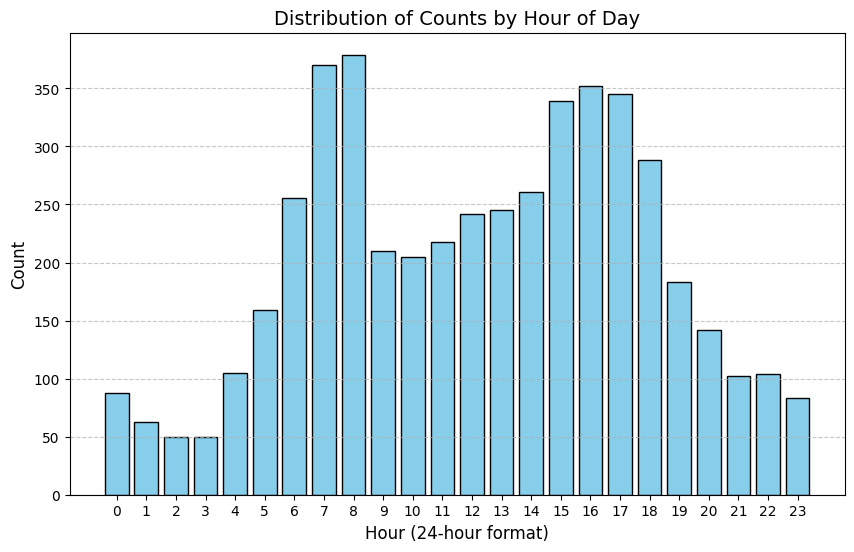

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_plots['hour'], bins=range(25), rwidth=0.8, color='skyblue', edgecolor='black', align='left')

# 4. Formatting the chart
plt.title('Distribution of Counts by Hour of Day', fontsize=14)
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()